In [2]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
pd.set_option('display.max_columns',None)
#from Bio import SeqIO

project_dir = '/home/tuttle/data/HDX-MS/sHSP_Heterooligomers/hxex_analysis_05feb2024/'

Output_DIRs = {'b1_hetero':'/home/tuttle/data/HDX-MS/sHSP_Heterooligomers/b1_hetero/SpecExport/hdxms_analysis_02Feb2024',
               'b5_hetero':'/home/tuttle/data/HDX-MS/sHSP_Heterooligomers/b5_hetero/SpecExport/hdxms_analysis_combined',
               'b6_hetero':'/home/tuttle/data/HDX-MS/sHSP_Heterooligomers/b6_hetero/SpecExport/hdxms_analysis_05Feb2024',}

metadfs = {'b1_hetero':'metadf_asrun_02Feb2024.csv',
           'b5_hetero':'metadf_asrun_combined.csv',
           'b6_hetero':'metadf_asrun_05Feb2024.csv',}

datafits = {'b1_hetero':'data_fits02Feb2024.csv',
           'b5_hetero':'data_fits_as_run_combined.csv',
           'b6_hetero':'data_fits05Feb2024.csv',}

#projects = list(Output_DIRs.keys())
projects = ['b1_hetero','b5_hetero','b6_hetero']
metadf = {}
datafit = {}

for p in projects: 
    metadf[p] = pd.read_csv(os.path.join(Output_DIRs[p],metadfs[p])).drop('Index',axis=1)
    datafit[p] = pd.read_csv(os.path.join(Output_DIRs[p],datafits[p])).drop(['Index'],axis=1)
    datafit[p][['start','end']] = datafit[p]['peptide_range'].str.split('-',expand=True).astype('int')
    datafit[p]['fracDeut_1'] = datafit[p]['Dabs_1']/datafit[p]['max_namides']
    datafit[p]['fracDeut_2'] = datafit[p]['Dabs_2']/datafit[p]['max_namides']
    #cleanup garbage output - accidental carryover of polymodal data when rolling back to previous number of populations
    datafit[p].loc[datafit[p]['pop_1'] == 1.0, ['centroid_2','Dabs_2','Dabs_std_2','pop_2','pop_std_2','fracDeut_2']] = np.nan

saving figure as  hxex_b1_hetero_UptakePlots_time0sec


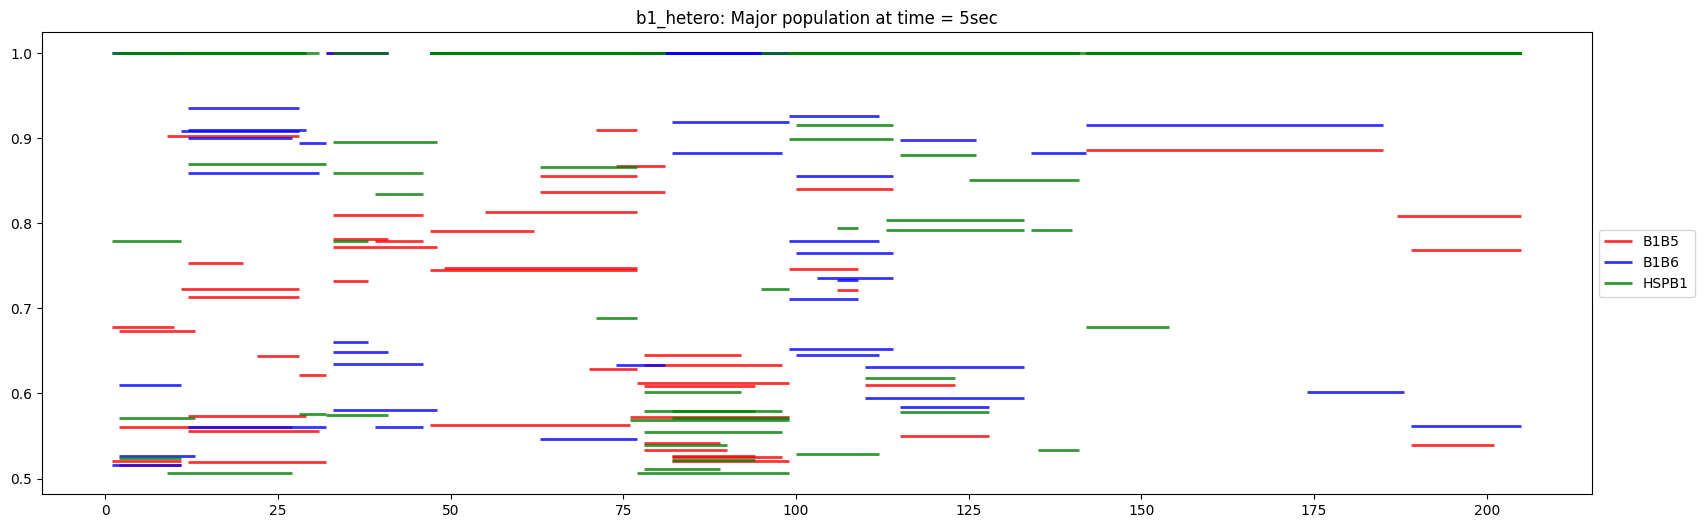

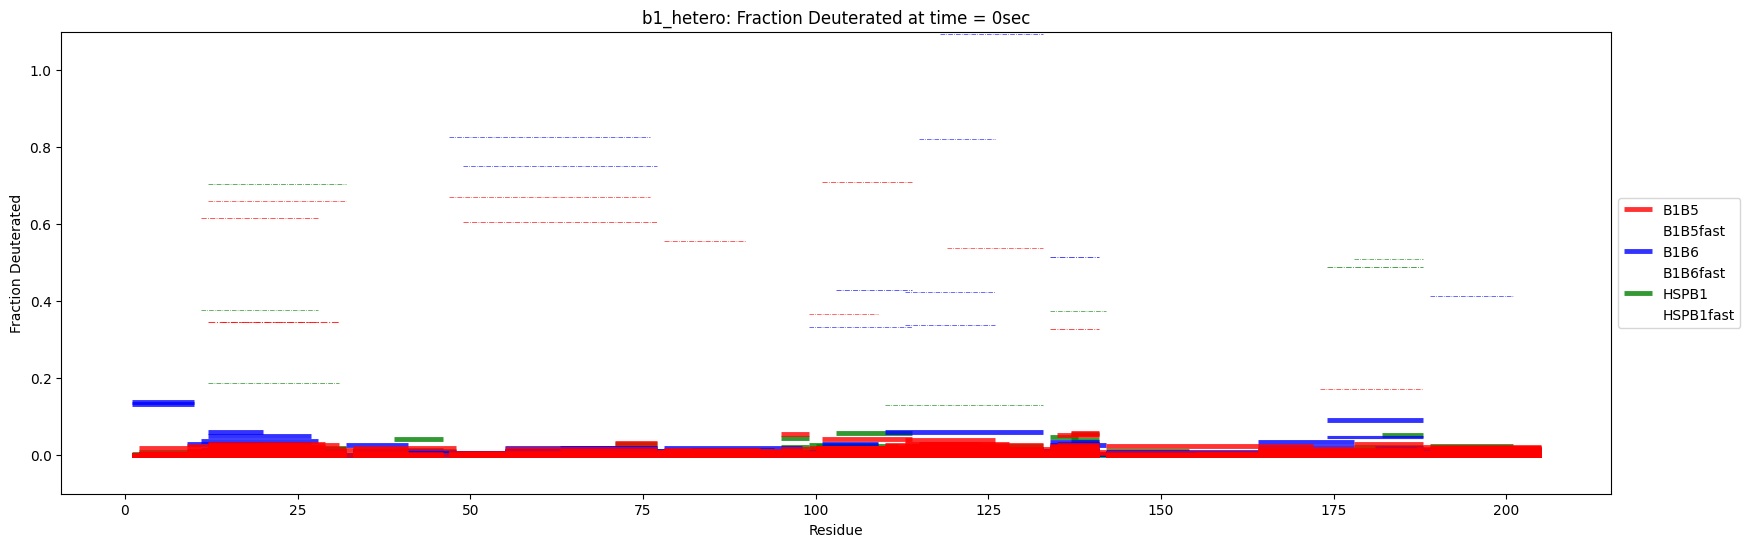

saving figure as  hxex_b1_hetero_UptakePlots_time5sec


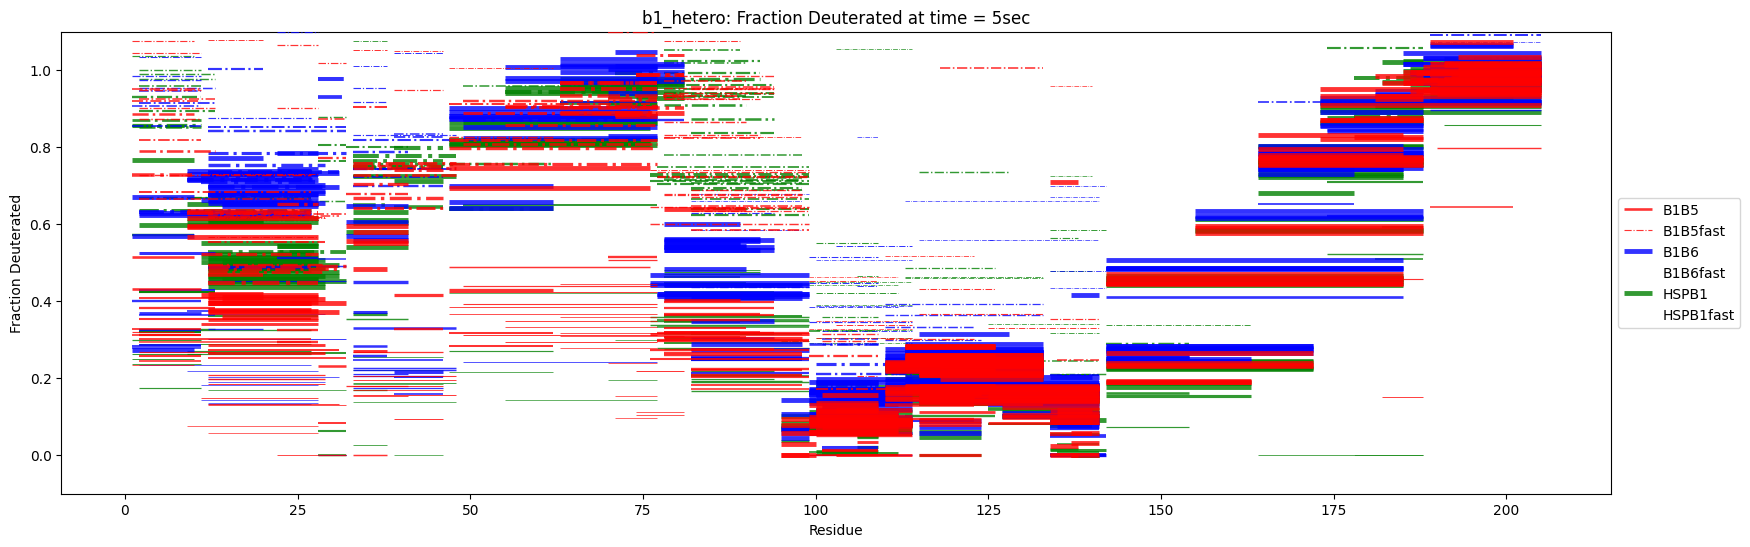

saving figure as  hxex_b1_hetero_UptakePlots_time60sec


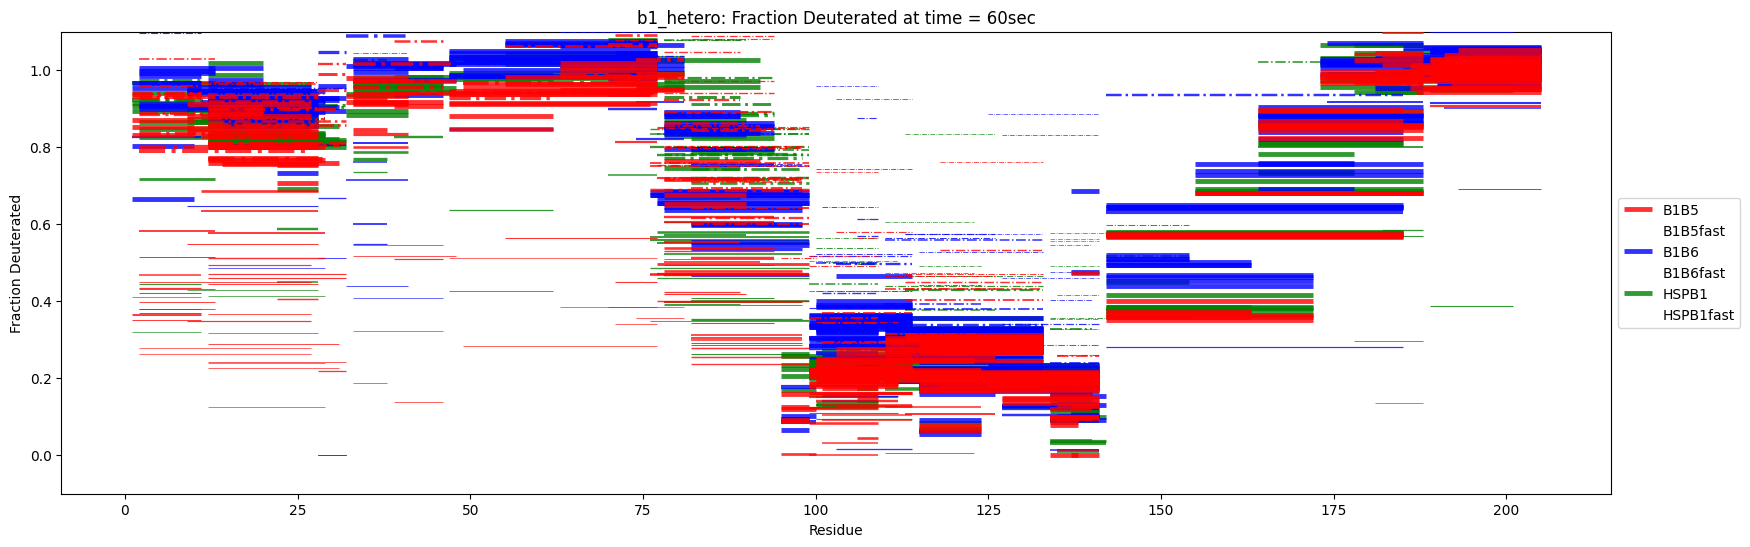

saving figure as  hxex_b1_hetero_UptakePlots_time300sec


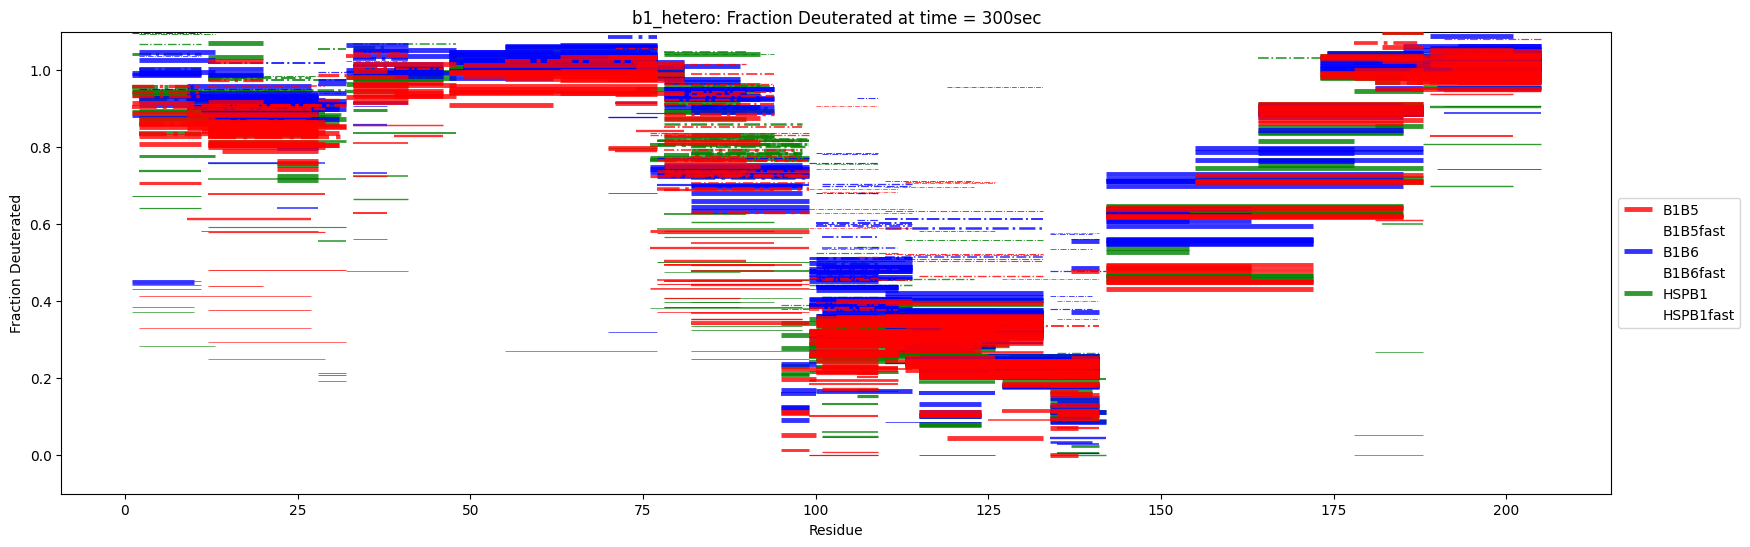

saving figure as  hxex_b1_hetero_UptakePlots_time1800sec


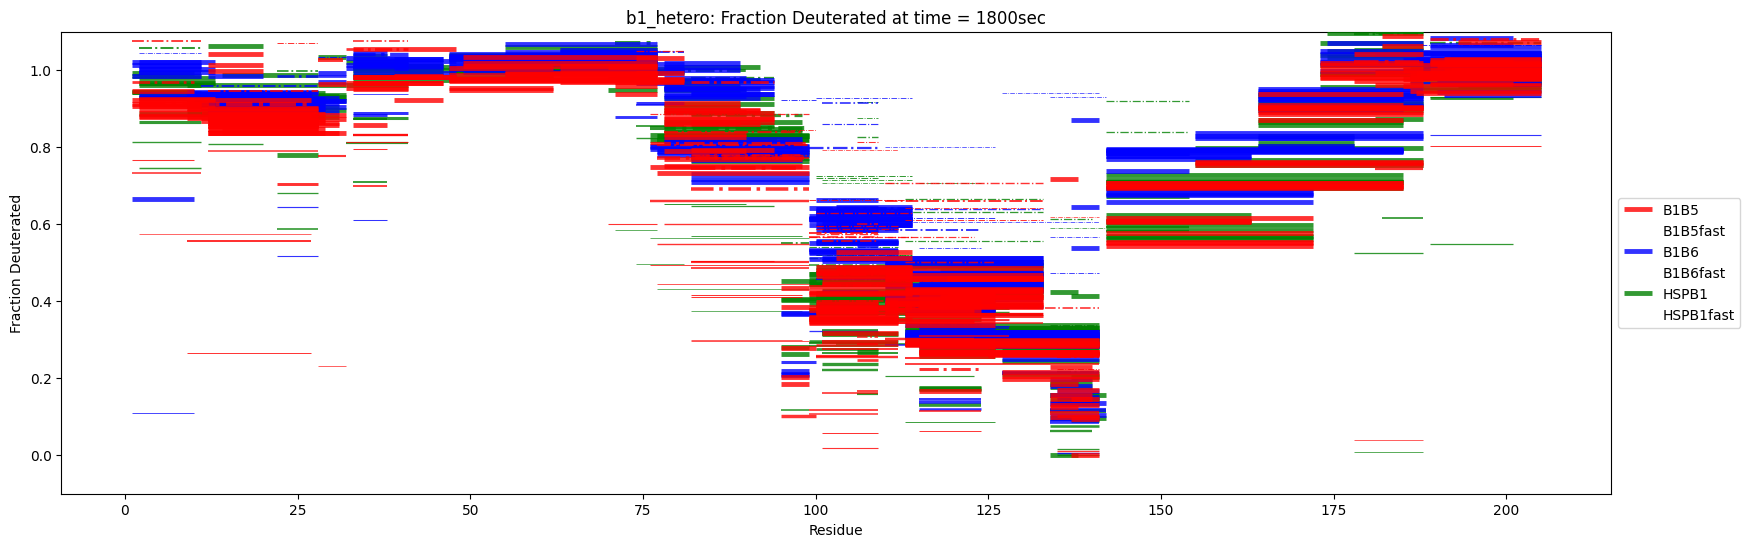

saving figure as  hxex_b1_hetero_UptakePlots_time72000sec


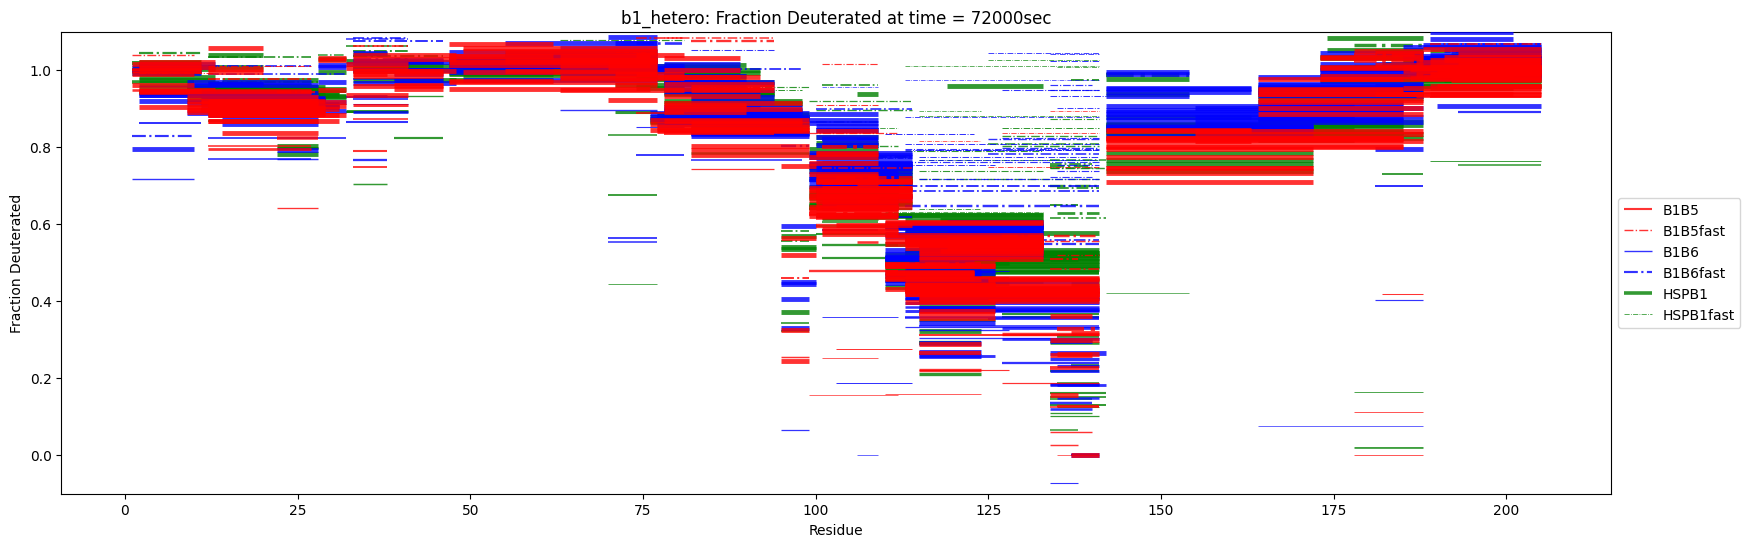

saving figure as  hxex_b1_hetero_UptakePlots_time1000000sec


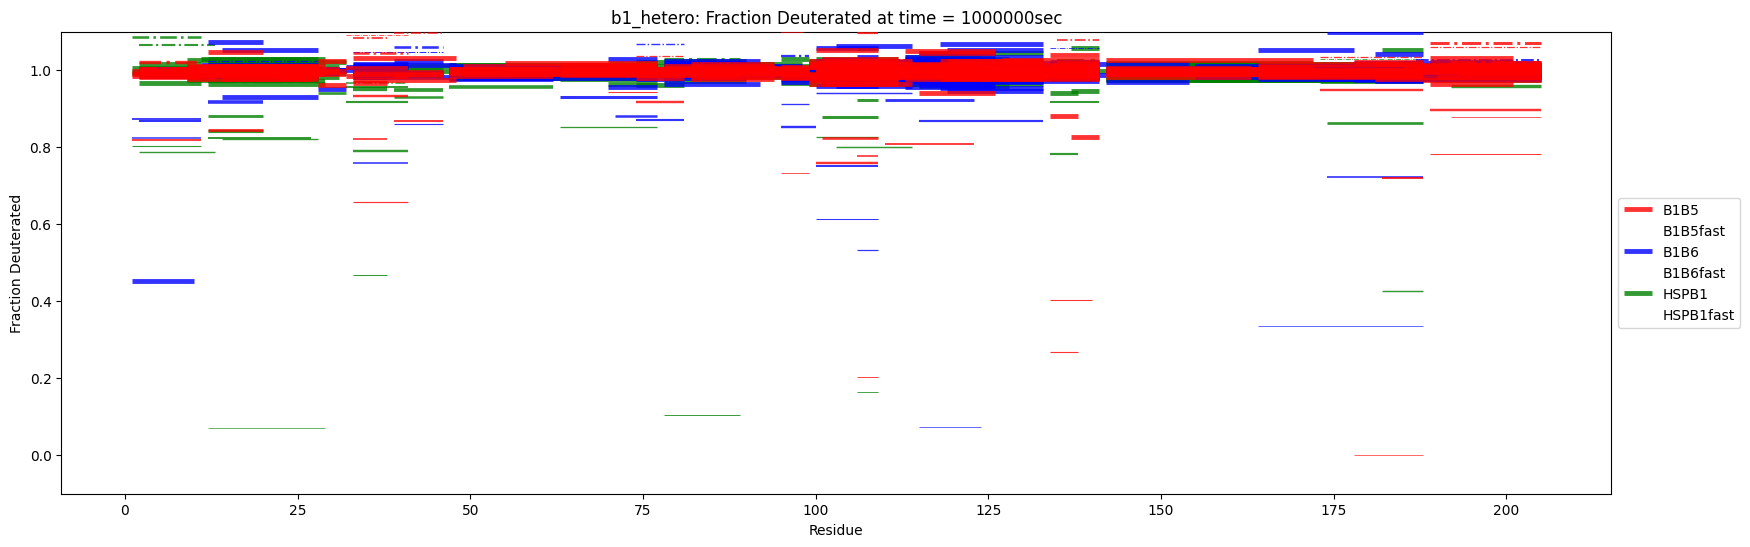

saving figure as  hxex_b5_hetero_UptakePlots_time0sec


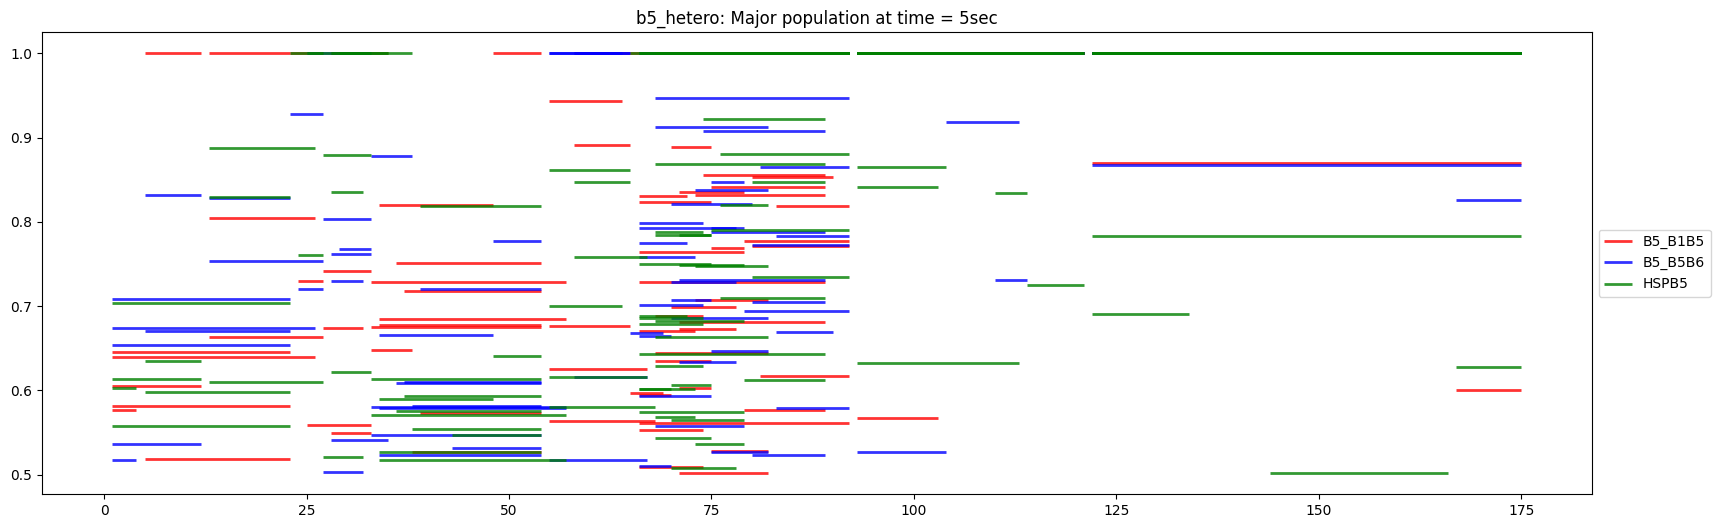

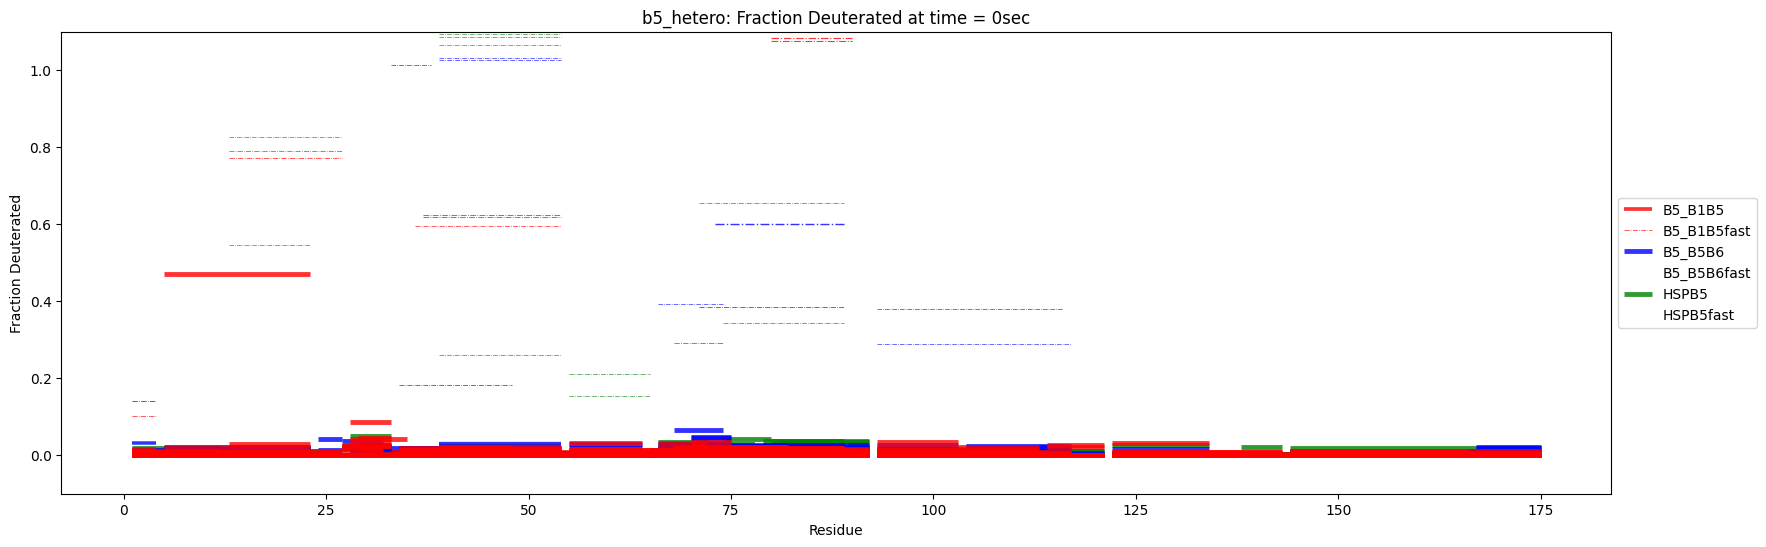

saving figure as  hxex_b5_hetero_UptakePlots_time5sec


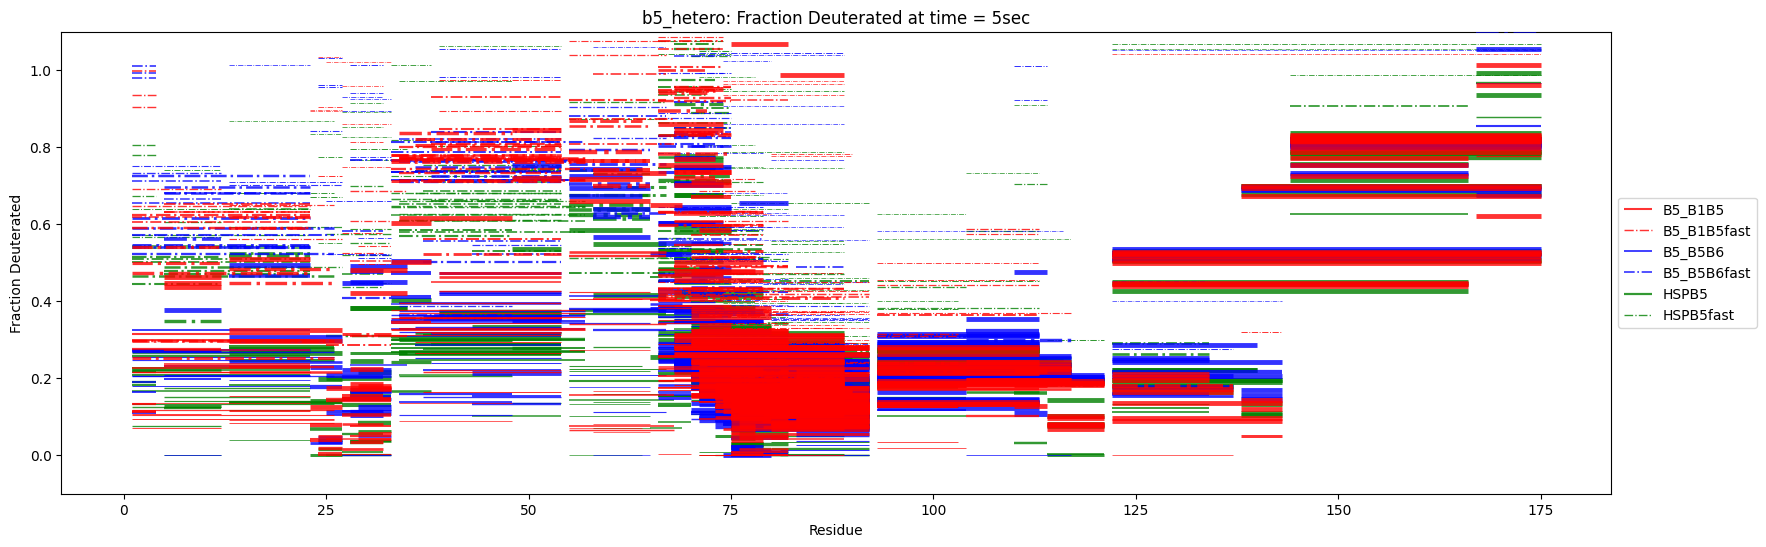

saving figure as  hxex_b5_hetero_UptakePlots_time60sec


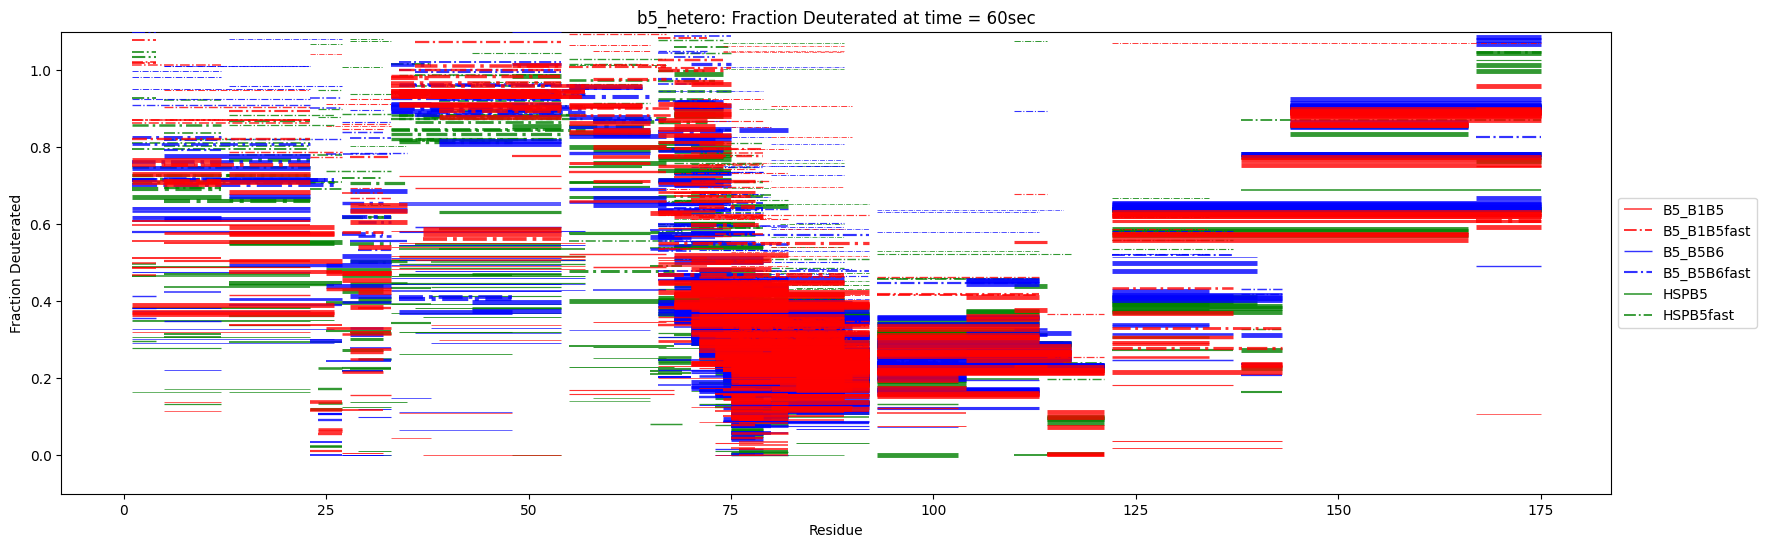

saving figure as  hxex_b5_hetero_UptakePlots_time300sec


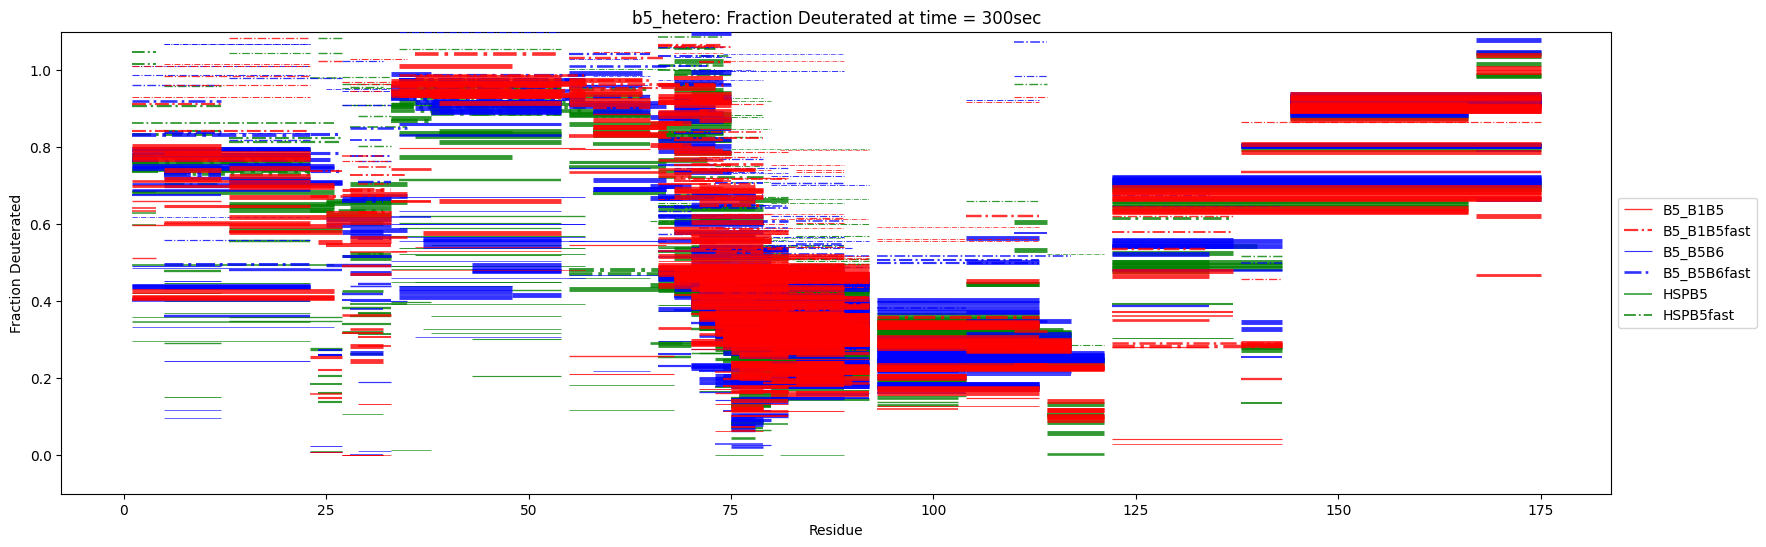

saving figure as  hxex_b5_hetero_UptakePlots_time1800sec


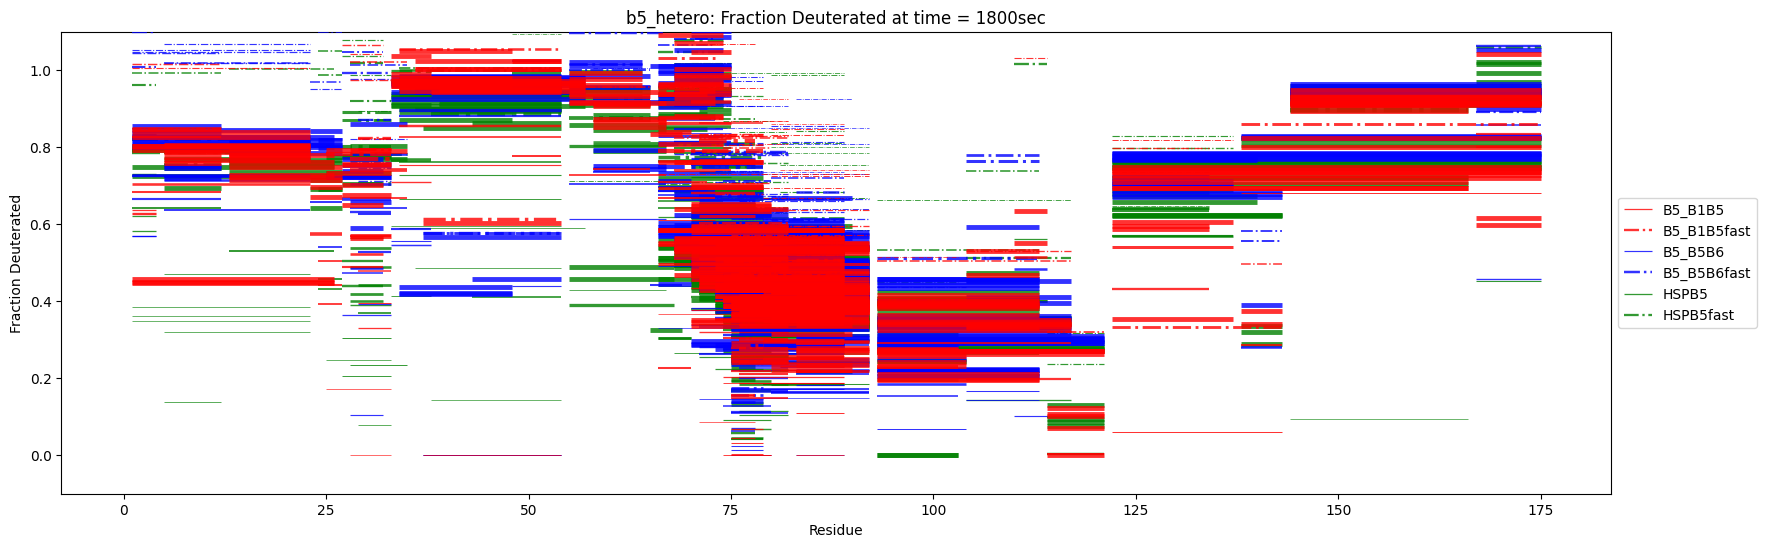

saving figure as  hxex_b5_hetero_UptakePlots_time72000sec


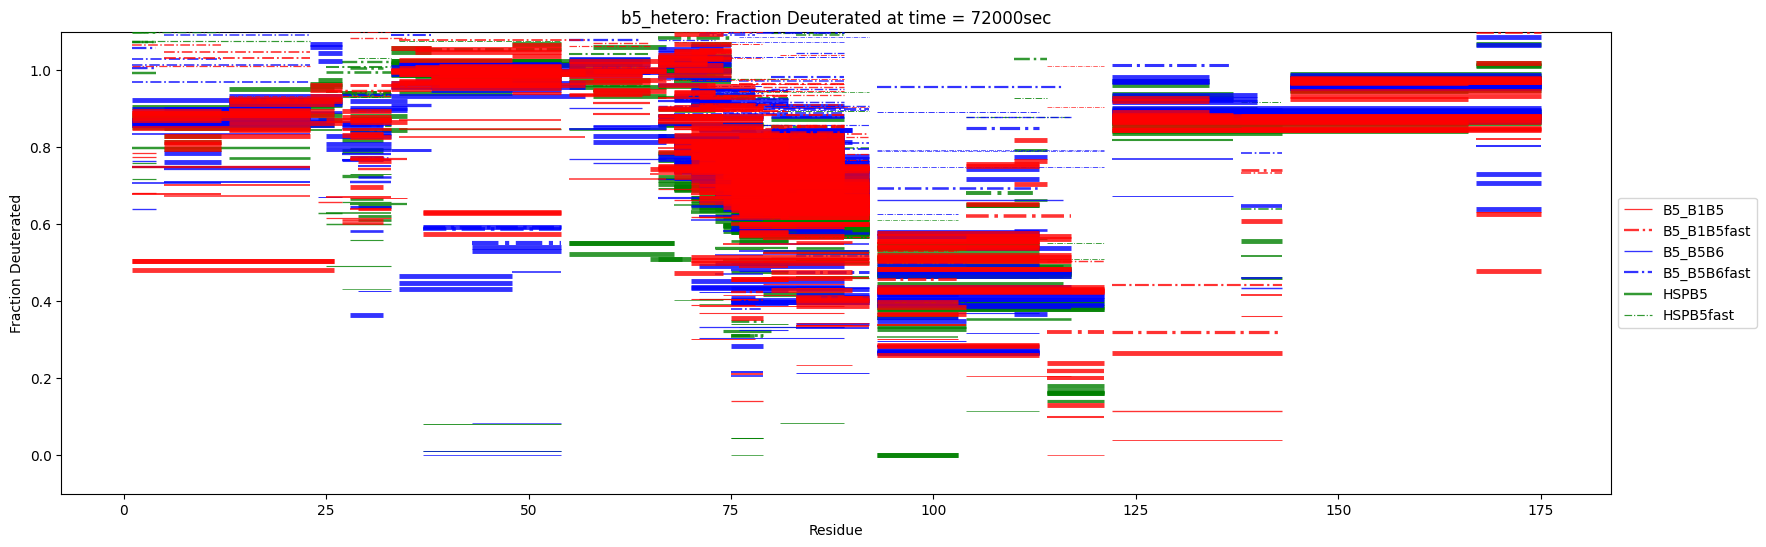

saving figure as  hxex_b5_hetero_UptakePlots_time1000000sec


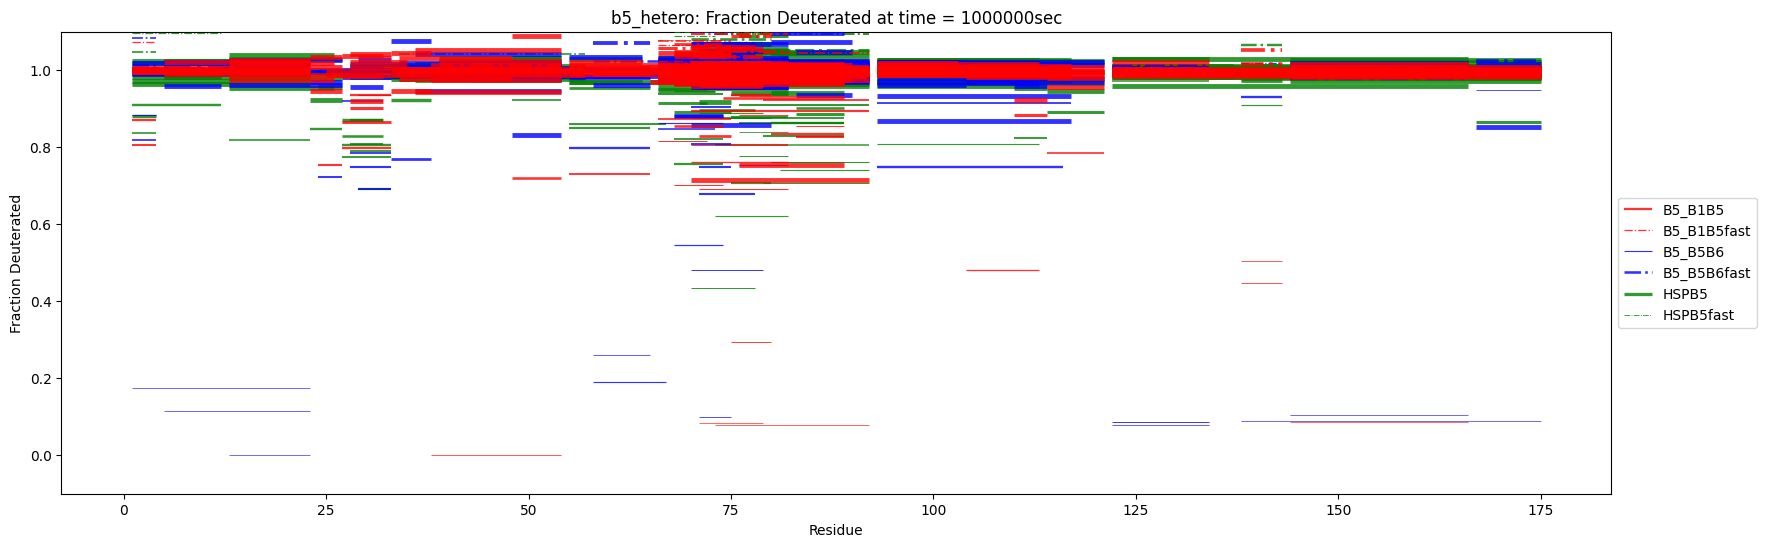

saving figure as  hxex_b6_hetero_UptakePlots_time0sec


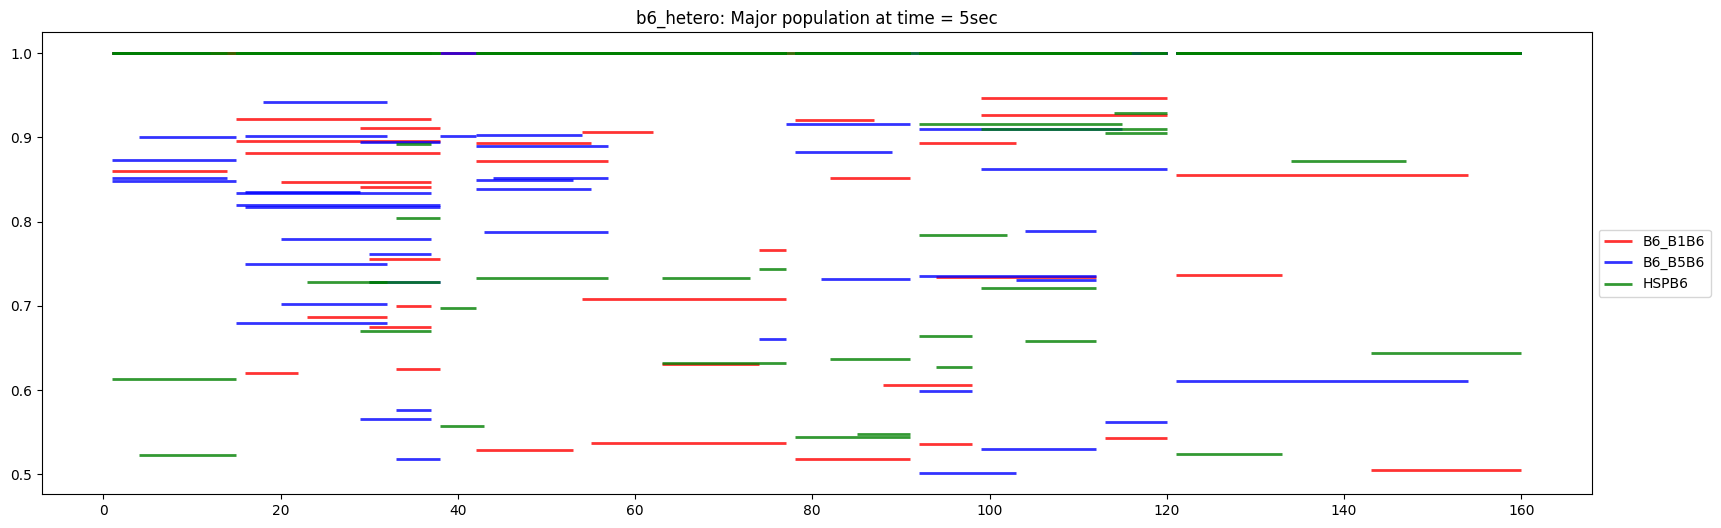

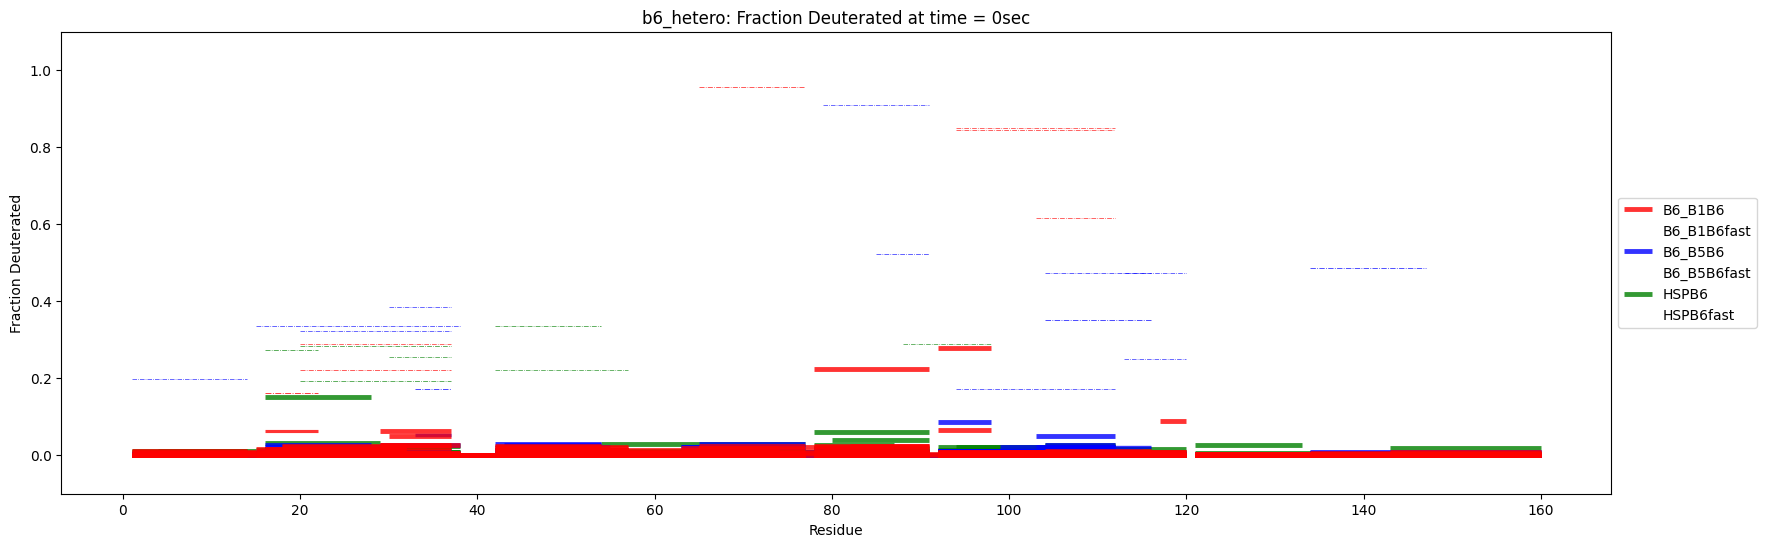

saving figure as  hxex_b6_hetero_UptakePlots_time5sec


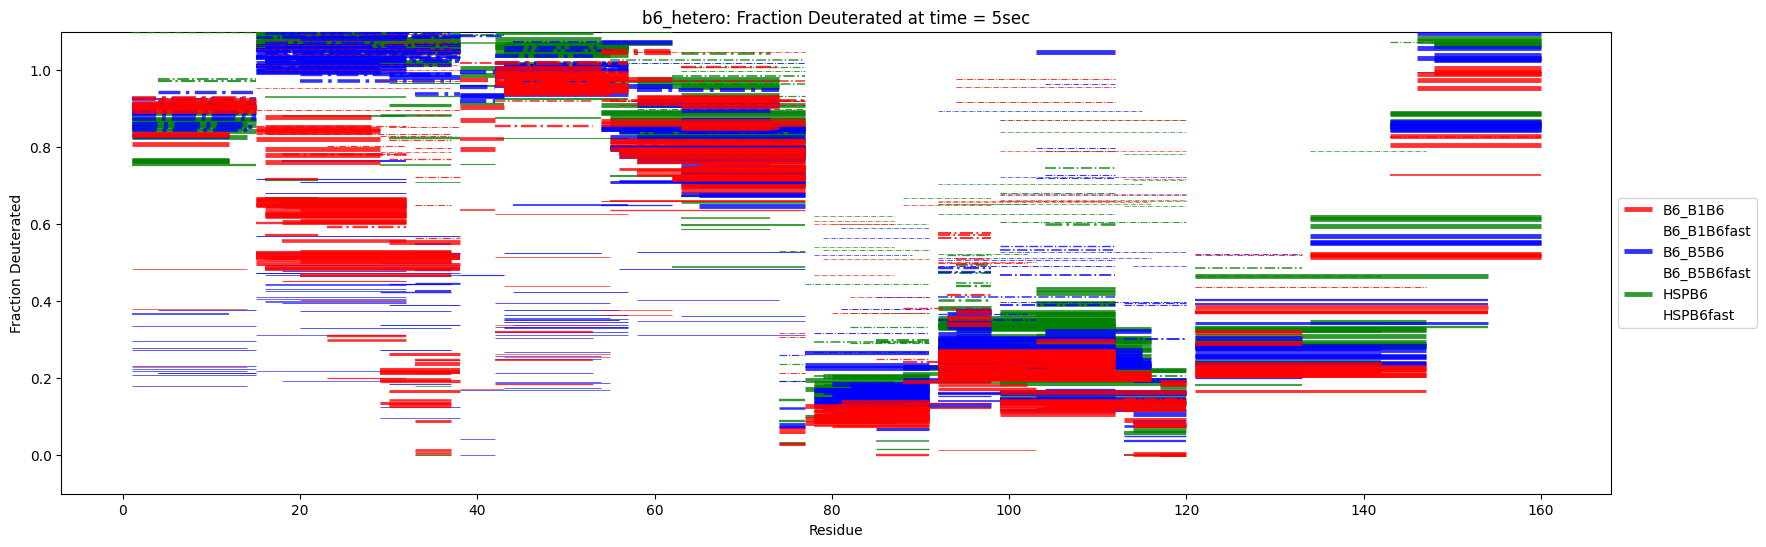

saving figure as  hxex_b6_hetero_UptakePlots_time60sec


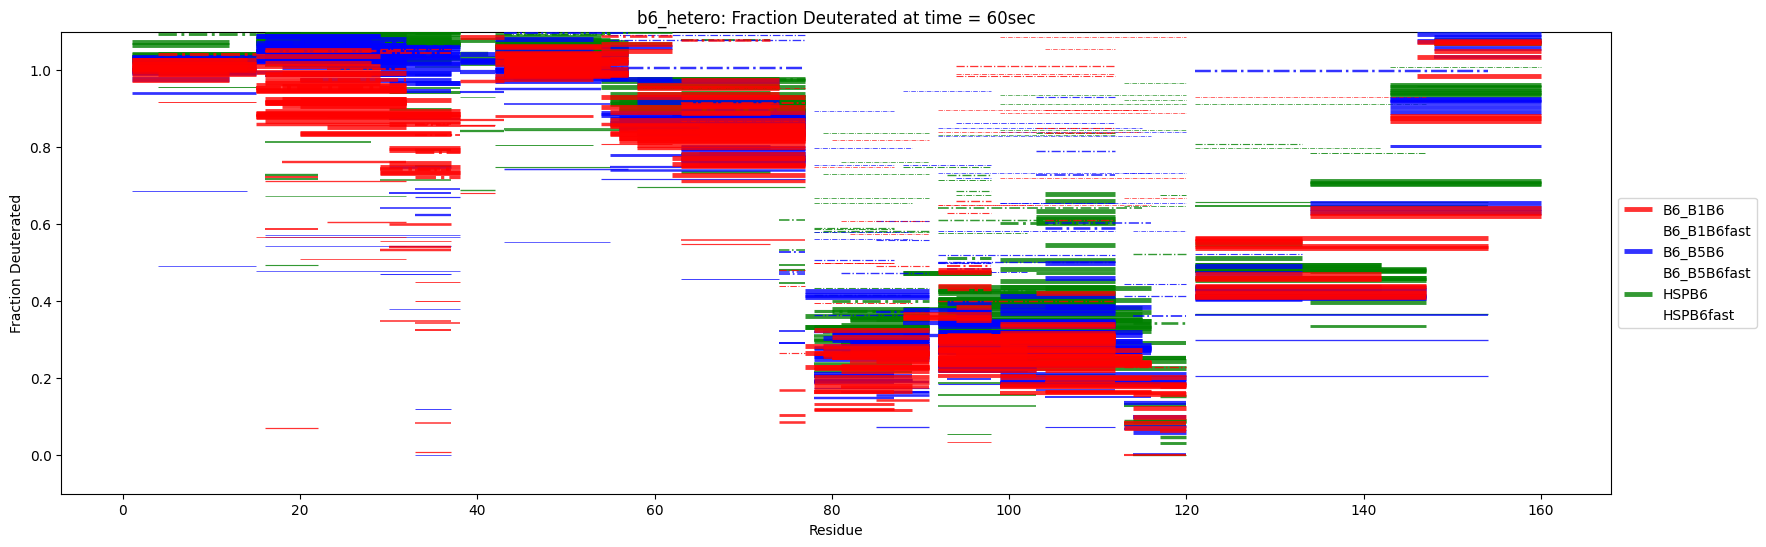

saving figure as  hxex_b6_hetero_UptakePlots_time300sec


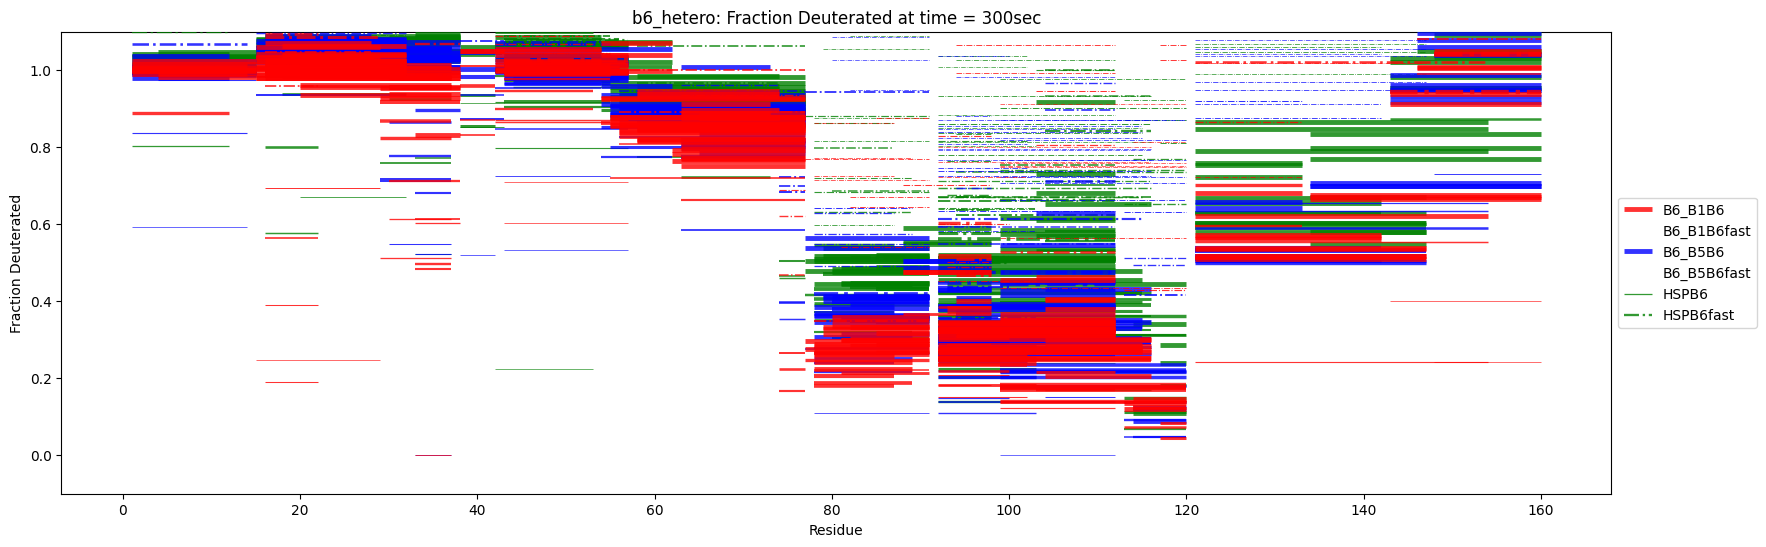

saving figure as  hxex_b6_hetero_UptakePlots_time1800sec


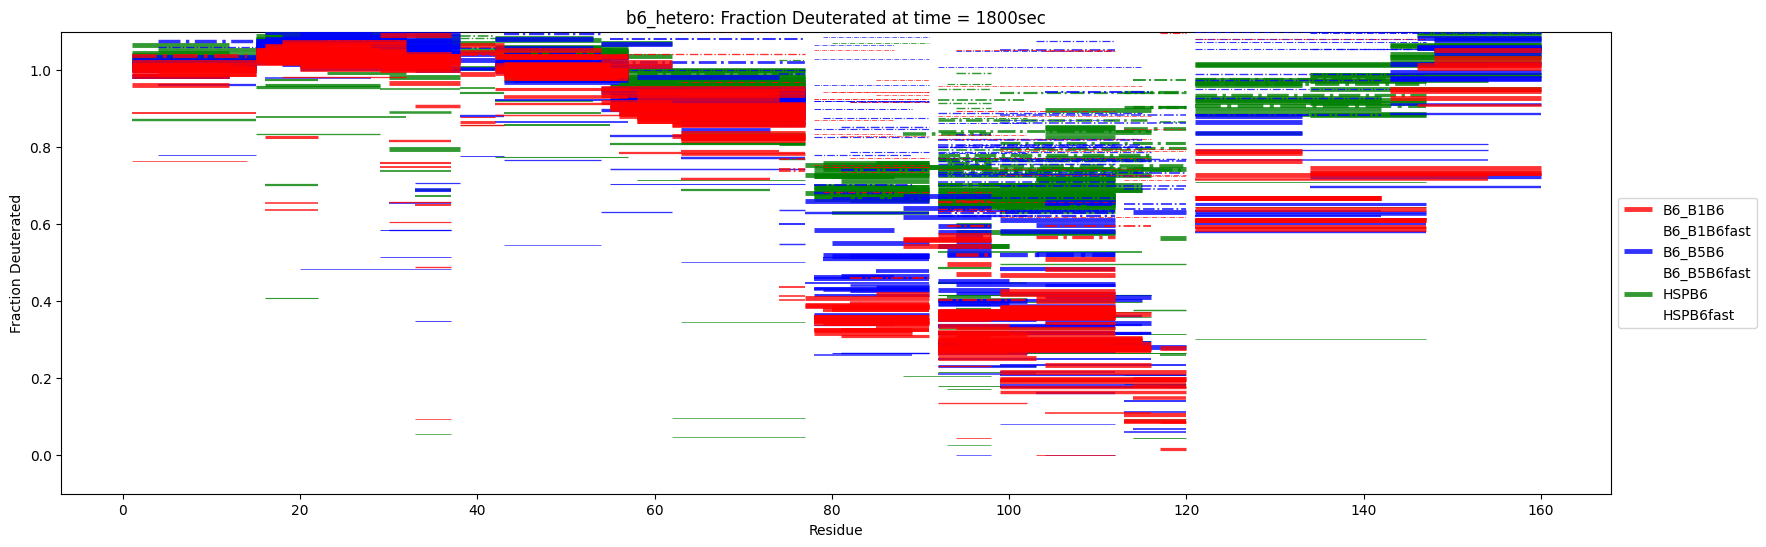

saving figure as  hxex_b6_hetero_UptakePlots_time72000sec


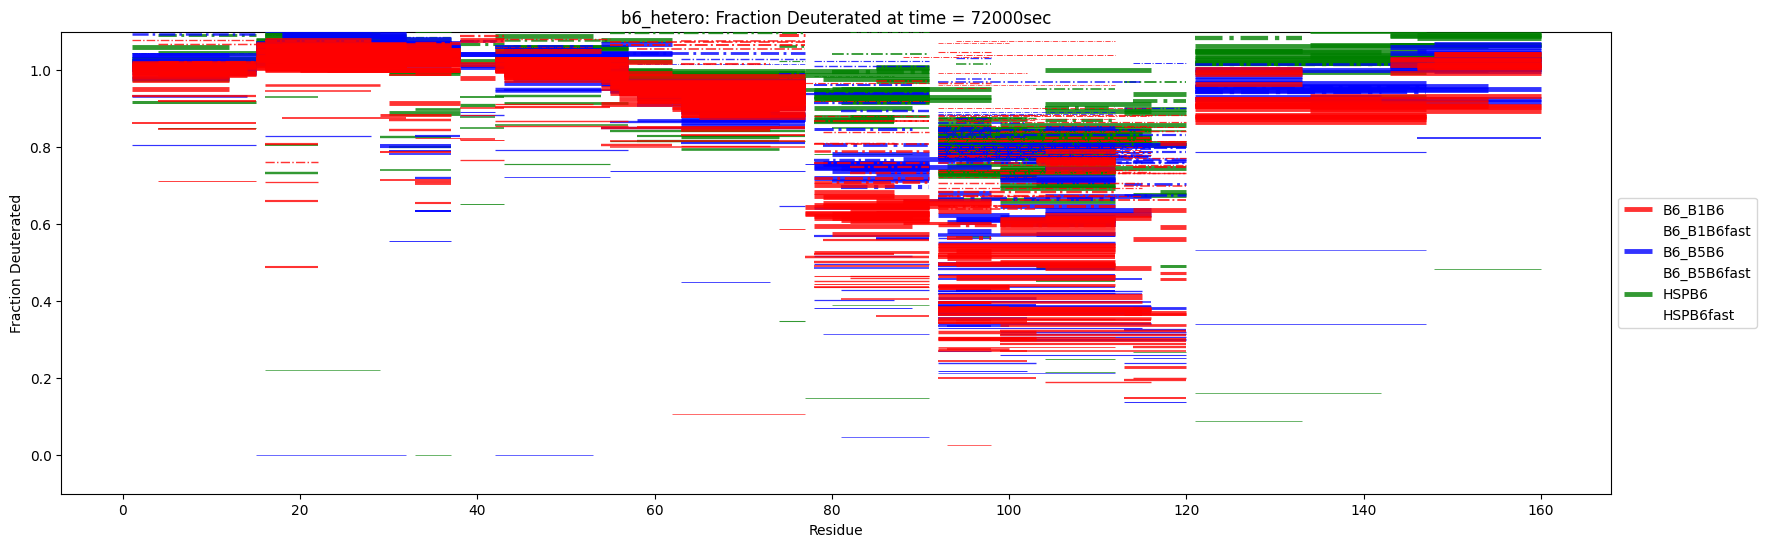

saving figure as  hxex_b6_hetero_UptakePlots_time1000000sec


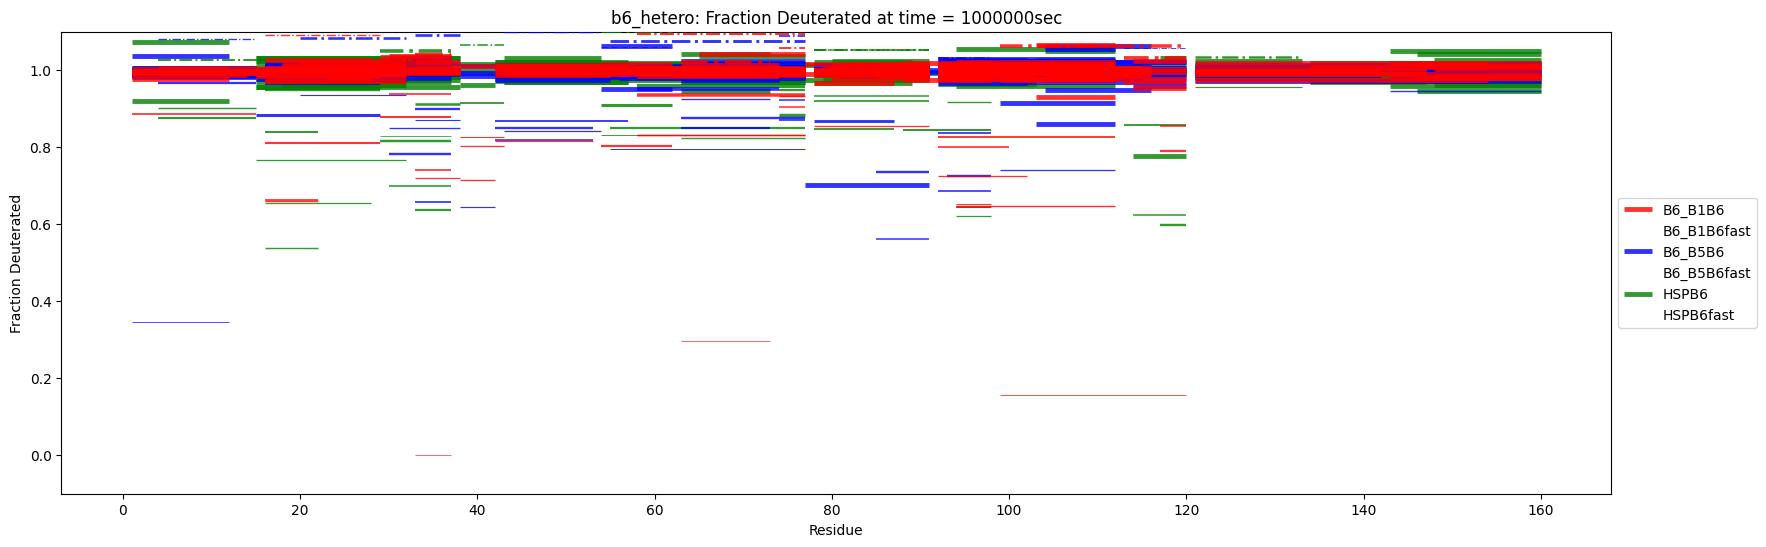

In [329]:
# metadf['b1_hetero']
# datafit['b1_hetero']

#project = 'b6_hetero'
for project in projects:
    times = datafit[project]['time'].unique().tolist()
    states = datafit[project]['sample'].unique().tolist()

    colors=('red blue green orange purple cyan magenta').split()

    pfig,pax = plt.subplots(figsize=(20,6))
    for i,s in enumerate(states):
        usetime = 5
        reps = np.arange(1,2) #1,4
        focal_data = datafit[project].copy()[(datafit[project]['sample']==s) & (datafit[project]['time']==usetime) & (datafit[project]['rep'].isin(reps))]
        yd = np.nanmax(focal_data[['pop_1','pop_2']],axis=1)
        xmin = focal_data['start']
        xmax = focal_data['end']
        #ax.hlines(y = yd, xmin = focal_data['start'], xmax=focal_data['end'],color=colors[i])
        pax.hlines(y = yd, xmin = xmin, xmax = xmax,color=colors[i],label=s,linewidth=2,alpha=0.8)
    pax.set_title(project+': Major population at time = '+str(usetime)+'sec')
    pax.legend(bbox_to_anchor=(1,0.5),loc='center left',);

    # try:
    #     figfile = 'hdx_ms_allStates_maxpop_globalFit.pdf'
    #     print("saving figure as ",figfile)
    #     fig.savefig(os.path.join(project_dir,figfile),format='pdf',dpi=600)
    #     plt.show()
    # except IOError as e:
    #     print (f"Could not save: {figfile} file is open")  

    for time in times:
        usetime = time

        focal_data = datafit[project].copy()[(datafit[project].time == usetime)]
        # data_IDs = metadf[project][metadf[project]['comment'].isna()].index #for now remove anything with Un/TD bimodals 
        # focal_data = focal_data[focal_data['data_id'].isin(data_IDs)]
        # data_IDs = metadf[project][metadf[project]['polymodal'].str.contains('5 60') == True].index
        # focal_data = focal_data[focal_data['data_id'].isin(data_IDs)]  #Filter only bimodals at both 5 and 60 seconds
    
        fig,ax = plt.subplots(figsize=(20,6))
        
        for i,s in enumerate(states):
            yd = focal_data['fracDeut_1'][focal_data['sample']==s]
            xmin = focal_data['start'][focal_data['sample']==s]
            xmax = focal_data['end'][focal_data['sample']==s]
            lwidths = focal_data['pop_1'][focal_data['sample']==s]**2.0 *3.+0.5
            ax.hlines(y = yd, xmin = xmin, xmax = xmax,color=colors[i],label=s,linewidth=lwidths,alpha=0.8,zorder=10-i)

            yd = focal_data['fracDeut_2'][focal_data['sample']==s]
            xmin = focal_data['start'][focal_data['sample']==s]
            xmax = focal_data['end'][focal_data['sample']==s]
            lwidths = focal_data['pop_2'][focal_data['sample']==s]**2.0 *3.+0.5
            if len(yd[yd.notnull()]):
                ax.hlines(y = yd, xmin = xmin, xmax = xmax,color=colors[i],label=s+'fast',linewidth=lwidths,alpha=0.8,zorder=10-i,linestyles='-.')
        ax.set_title(project+': Fraction Deuterated at time = '+str(time)+'sec')
        ax.legend(bbox_to_anchor=(1,0.5),loc='center left',);
        ax.set_ylabel("Fraction Deuterated")
        ax.set_xlabel("Residue");
        ax.set_ylim(-0.1,1.1)

        try:
            figfile = 'hxex_'+project+'_UptakePlots_time'+str(time)+'sec'
            print("saving figure as ",figfile)
            #fig.savefig(os.path.join(project_dir,figfile+'.pdf'),format='pdf',dpi=600)
            fig.savefig(os.path.join(project_dir,figfile+'.jpg'),format='jpg',dpi=600)
            plt.show()
        except IOError as e:
            print (f"Could not save: {figfile} file is open")  


In [274]:
datafit['b6_hetero']

data_id   sample        peptide peptide_range  charge     time  rep  \
0           0  B6_B1B6   MEIPVPVQPSWL     0001-0012     2.0        0    1   
1           0  B6_B1B6   MEIPVPVQPSWL     0001-0012     2.0        0    2   
2           0  B6_B1B6   MEIPVPVQPSWL     0001-0012     2.0        5    1   
3           0  B6_B1B6   MEIPVPVQPSWL     0001-0012     2.0        5    2   
4           0  B6_B1B6   MEIPVPVQPSWL     0001-0012     2.0        5    3   
...       ...      ...            ...           ...     ...      ...  ...   
5910      383    HSPB6  PASAQAPPPAAAK     0148-0160     2.0    72000    1   
5911      383    HSPB6  PASAQAPPPAAAK     0148-0160     2.0    72000    2   
5912      383    HSPB6  PASAQAPPPAAAK     0148-0160     2.0    72000    3   
5913      383    HSPB6  PASAQAPPPAAAK     0148-0160     2.0  1000000    1   
5914      383    HSPB6  PASAQAPPPAAAK     0148-0160     2.0  1000000    2   

        centroid  env_width  env_symm  max_namides  fit_pops   p-value  \
0     698.835258   2.779626  2.000000            8         1  1.000000   
1     698.847356   3.432526  2.000000            8         1  1.000000   
2     700.744020   8.154449  1.100000            8         1  1.000000   
3     700.693768   8.702263  1.100000            8         1  1.000000   
4     700.780231   9.323305  1.115084            8         1  1.000000   
...          ...        ...       ...          ...       ...       ...   
5910  591.279884   7.804361  1.100000            9         1  1.000000   
5911  591.236224   8.436205  1.100000            9         1  1.000000   
5912  591.342017   7.858789  1.100000            9         2  0.013201   
5913  591.174944   7.327643  1.100000            9         1  1.000000   
5914  591.258302   8.403134  1.100000            9         1  1.000000   

      centroid_1        Dabs_1    Dabs_std_1     pop_1  pop_std_1  centroid_2  \
0     698.842113  4.710838e-07  8.063119e-07  1.000000   0.000000         NaN   
1     698.842113  1.330810e-07  3.566114e-07  1.000000   0.000000         NaN   
2     700.711496  6.671617e+00  3.429287e-02  1.000000   0.000000         NaN   
3     700.659918  6.474298e+00  2.437464e-02  1.000000   0.000000         NaN   
4     700.714487  6.662809e+00  3.069895e-02  1.000000   0.000000         NaN   
...          ...           ...           ...       ...        ...         ...   
5910  591.332405  9.265934e+00  1.764209e-03  1.000000   0.000000         NaN   
5911  591.323618  9.231218e+00  9.431688e-03  1.000000   0.000000         NaN   
5912  590.186532  4.362981e+00  1.661360e-01  0.145152   0.007304   591.50506   
5913  591.187324  8.644001e+00  1.770265e-03  1.000000   0.000000         NaN   
5914  591.327213  9.249858e+00  1.292542e-02  1.000000   0.000000         NaN   

        Dabs_2  Dabs_std_2     pop_2  pop_std_2  start  end    fracDeut_1  \
0          NaN         NaN       NaN        NaN      1   12  5.888548e-08   
1          NaN         NaN       NaN        NaN      1   12  1.663512e-08   
2          NaN         NaN       NaN        NaN      1   12  8.339521e-01   
3          NaN         NaN       NaN        NaN      1   12  8.092872e-01   
4          NaN         NaN       NaN        NaN      1   12  8.328511e-01   
...        ...         ...       ...        ...    ...  ...           ...   
5910       NaN         NaN       NaN        NaN    148  160  1.029548e+00   
5911       NaN         NaN       NaN        NaN    148  160  1.025691e+00   
5912  9.978526    0.019921  0.854848   0.007304    148  160  4.847757e-01   
5913       NaN         NaN       NaN        NaN    148  160  9.604446e-01   
5914       NaN         NaN       NaN        NaN    148  160  1.027762e+00   

      fracDeut_2  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
5910         NaN  
5911         NaN  
5912    1.108725  
5913         NaN  
5914         NaN  

[5915 rows x 27 columns]

In [327]:
#project_dir = '/home/tuttle/data/HDX-MS/sHSP_Heterooligomers/hxex_analysis_05feb2024/'
for project in projects:
    datafit[project].to_csv(os.path.join(project_dir,'datafits_'+project+'.csv'),index_label='Index')
    metadf[project].to_csv(os.path.join(project_dir,'metadf_'+project+'.csv'),index_label='Index')

In [146]:
focal_data = datafit[project].copy()[(datafit[project]['sample']==s) & (datafit[project]['time']==5)]
yd = np.nanmax(focal_data[['pop_1','pop_2']],axis=1)
focal_data

data_id sample       peptide peptide_range  charge  time  rep  \
37          2  HSPB5          MDIA     0001-0004     1.0     5    1   
38          2  HSPB5          MDIA     0001-0004     1.0     5    2   
39          2  HSPB5          MDIA     0001-0004     1.0     5    3   
104        10  HSPB5  MDIAIHHPWIRR     0001-0012     3.0     5    1   
105        10  HSPB5  MDIAIHHPWIRR     0001-0012     3.0     5    2   
...       ...    ...           ...           ...     ...   ...  ...   
8321      493  HSPB5     PAVTAAPKK     0167-0175     1.0     5    1   
8322      493  HSPB5     PAVTAAPKK     0167-0175     1.0     5    2   
8334      494  HSPB5     PAVTAAPKK     0167-0175     2.0     5    1   
8335      494  HSPB5     PAVTAAPKK     0167-0175     2.0     5    2   
8336      494  HSPB5     PAVTAAPKK     0167-0175     2.0     5    3   

        centroid  env_width  env_symm  max_namides  fit_pops       p-value  \
37    450.085855   3.220856  2.000000            3         2           NaN   
38    450.054196   3.077222  2.000000            3         2           NaN   
39    449.978865   2.917871  2.000000            3         2           NaN   
104   516.640988   7.851058  1.485642           10         2  5.370569e-07   
105   516.626867   7.749386  1.311533           10         2  1.621831e-08   
...          ...        ...       ...          ...       ...           ...   
8321  887.220477   7.166356  1.100000            7         1  1.000000e+00   
8322  887.120202   6.401538  1.100000            7         2  4.937906e-03   
8334  444.194432   6.471110  1.100000            7         2  2.208312e-02   
8335  444.178855   6.499144  1.100000            7         2  6.768762e-04   
8336  444.119749   6.396556  1.100000            7         1  1.000000e+00   

      centroid_1    Dabs_1  Dabs_std_1     pop_1  pop_std_1  centroid_2  \
37    449.877948  0.647219    0.205229  0.602987   0.143021  450.662960   
38    449.859894  0.550874    0.227992  0.590106   0.153812  450.645300   
39    449.855219  0.568181    0.213353  0.624809   0.159224  450.610746   
104   516.103289  0.769766    0.002136  0.386230   0.001223  516.971049   
105   516.390120  2.201369    0.044039  0.662299   0.014236  517.077026   
...          ...       ...         ...       ...        ...         ...   
8321  887.140279  6.556170    0.063561  1.000000   0.000000         NaN   
8322  886.758440  4.718013    1.890222  0.500658   0.217366  888.921039   
8334  444.198490  6.769740    0.251094  0.628241   0.260026  444.201905   
8335  443.976191  6.143145    0.199249  0.422489   0.190970  444.236598   
8336  444.148831  6.952775    0.001131  1.000000   0.000000         NaN   

        Dabs_2  Dabs_std_2     pop_2  pop_std_2  start  end  fracDeut_1  \
37    2.418897    0.419219  0.397013   0.143021      1    4    0.215740   
38    2.339931    0.457299  0.409894   0.153812      1    4    0.183625   
39    2.022122    0.412861  0.375191   0.159224      1    4    0.189394   
104   5.149002    0.004136  0.613770   0.001223      1   12    0.076977   
105   5.658505    0.064577  0.337701   0.014236      1   12    0.220137   
...        ...         ...       ...        ...    ...  ...         ...   
8321       NaN         NaN       NaN        NaN    167  175    0.936596   
8322  8.216595    1.685618  0.499342   0.217366    167  175    0.674002   
8334  8.524678    1.054676  0.371759   0.260026    167  175    0.967106   
8335  8.113526    0.576388  0.577511   0.190970    167  175    0.877592   
8336       NaN         NaN       NaN        NaN    167  175    0.993254   

      fracDeut_2  
37      0.806299  
38      0.779977  
39      0.674041  
104     0.514900  
105     0.565851  
...          ...  
8321         NaN  
8322    1.173799  
8334    1.217811  
8335    1.159075  
8336         NaN  

[449 rows x 27 columns]

saving figure as  hxex_b1_hetero_roll10Hist_fracDeut.pdf


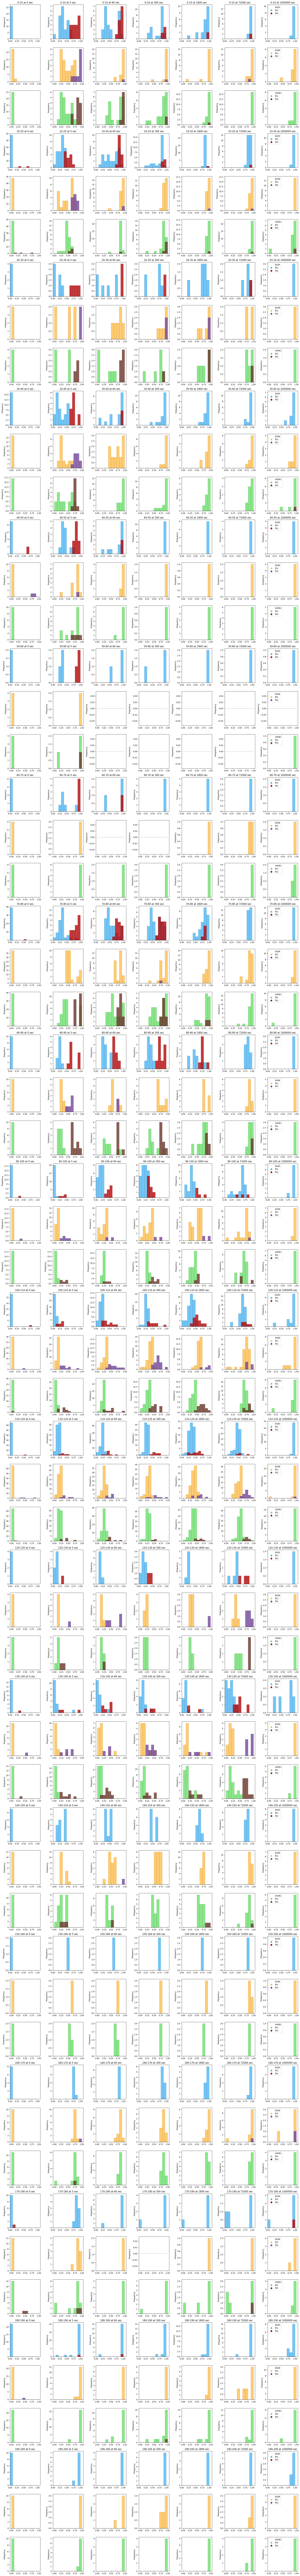

saving figure as  hxex_b5_hetero_roll10Hist_fracDeut.pdf


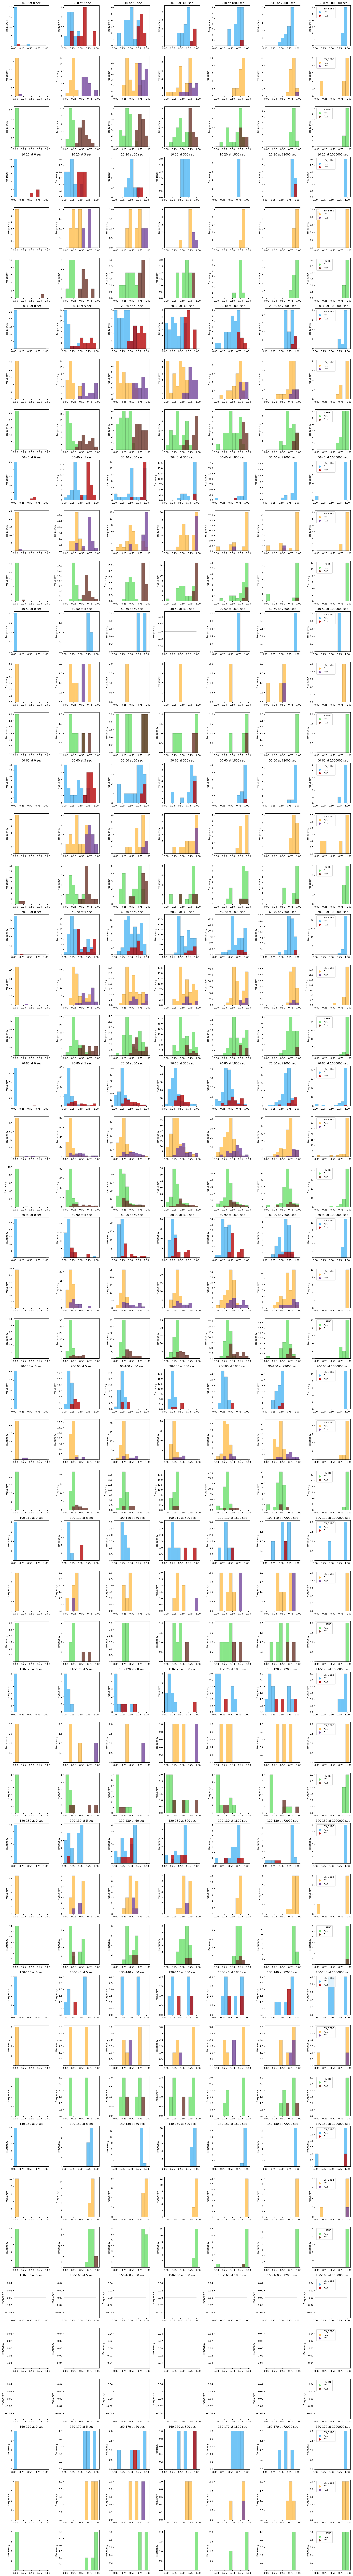

saving figure as  hxex_b6_hetero_roll10Hist_fracDeut.pdf


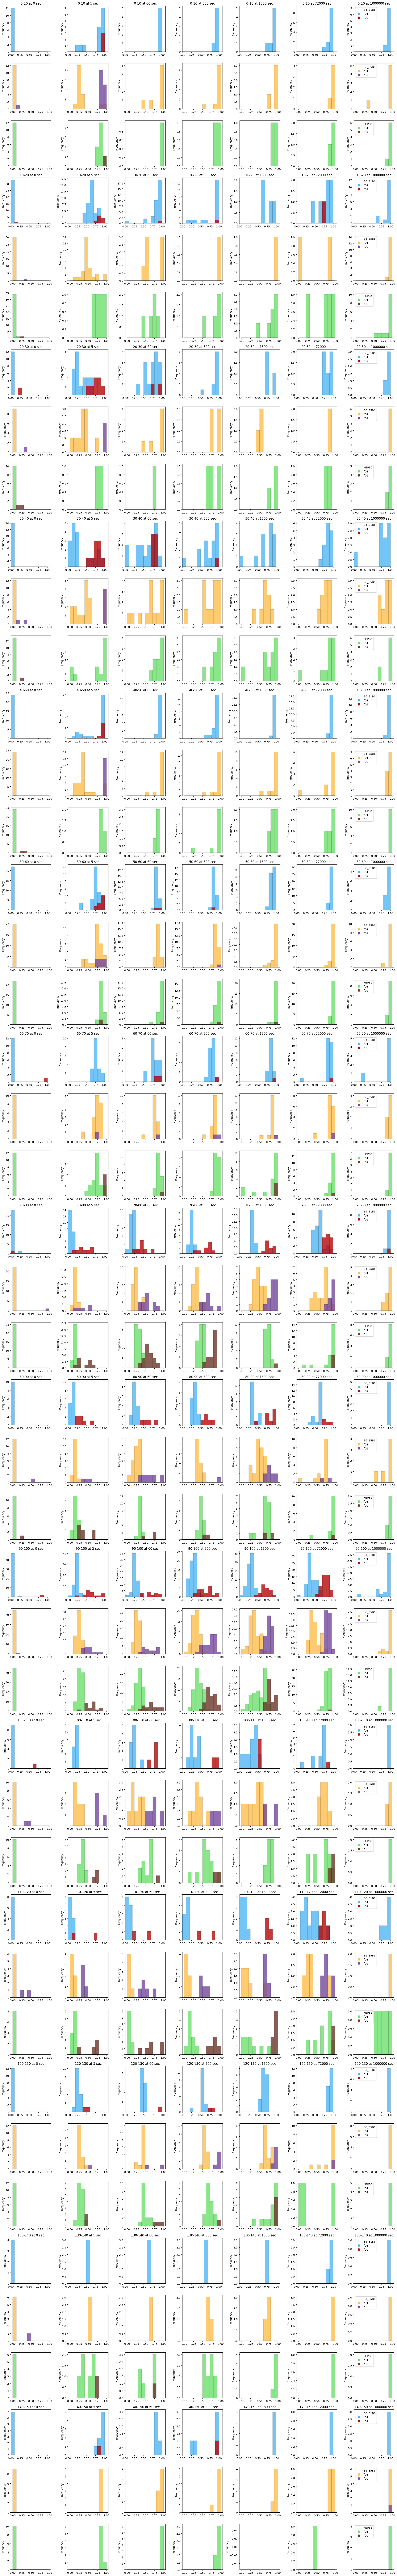

In [3]:
mpl_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
mpl_colors_dark = ['#005794', '#df5f0e', '#0c800c', '#b60708', '#74479d', '#6c362b', '#b357a2', '#5f5f5f', '#9c9d02', '#079eaf']
mpl_colors_light = ['#2f97e4', '#ff9f2e', '#4cc04c', '#f64748', '#b487ed', '#ac766b', '#f397e2', '#9f9f9f', '#dcdd42', '#37deef']
mpl_colors_light2 = ['#4fb7f4', '#ffbf4e', '#6ce06c', '#f66768', '#d4a7fd', '#cc968b', '#f3b7f2', '#bfbfbf', '#fcfd62', '#57feff']

#project = 'b6_hetero'
for project in projects:
    max_res = datafit[project]['start'].max()
    times = datafit[project]['time'].unique().tolist()
    states = datafit[project]['sample'].unique().tolist()
    usetime = times #[5,60] #columns
    step = 10 #rows 
    nrows = len(states)*(max_res//step+1)
    ncols = len(usetime)
    hfig,hax = plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*3))

    hax_legend_elements = []
    for irep in range(len(states)):
        hax_legend_elements += [ mlines.Line2D([0],[0], color='w',markerfacecolor = 'w',
                                            marker='o',label=states[irep],markersize=10),
                                mlines.Line2D([0],[0], color='w',markerfacecolor = mpl_colors_light2[irep],
                                            marker='o',label='fD1',markersize=10),
                                mlines.Line2D([0],[0], color='w',markerfacecolor = mpl_colors_dark[3+irep],
                                            marker='o',label='fD2',markersize=10),]


    for segment in np.arange(0,max_res,step):
        for tcol,t in enumerate(usetime):
            srow = len(states)*segment//step
            start = segment
            end = segment + step
            focal_data = datafit[project][(datafit[project]['time']==t)] #(datafit[project]['sample']==states[0]) & 
            focal_data = focal_data[(focal_data['start']>=start) & (focal_data['start']<end)]
            hax[srow,tcol].set_xlim(0.0,1.1)
            hax[srow,tcol].set_title(str(start)+'-'+str(end)+' at '+str(t)+' sec')
            for ns,s in enumerate(states):            
                #print(srow)
                si = states.index(s)
                sdata = focal_data.copy()[focal_data['sample']==s]
                sdata[['fracDeut_1','fracDeut_2']].plot.hist(alpha=0.8,linewidth=0.2,color=(mpl_colors_light2[si],mpl_colors_dark[3+si]),
                                                            edgecolor='k',ax=hax[srow,tcol],bins=10,range=(0,1),legend=None) #
                hax[srow,-1].legend(handles=hax_legend_elements[si*3:si*3+3],loc='upper left')
                srow += 1
    hfig.tight_layout()

    try:
        figfile = 'hxex_'+project+'_roll10Hist_fracDeut.pdf'
        print("saving figure as ",figfile)
        hfig.savefig(os.path.join(project_dir,figfile),format='pdf',dpi=600)
        plt.show()
    except IOError as e:
        print (f"Could not save: {figfile} file is open") 